In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

# Import Data

In [3]:
#image_dir = 'E:\Coursera\CVND\prj1\P1_Facial_Keypoints\data\\training'
image_dir = '.\\'
image_name = 'Abdullah_Gul_10.jpg'
img = cv2.imread(os.path.join(image_dir, image_name))

In [4]:
img_cp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_cp.shape

(275L, 227L, 3L)

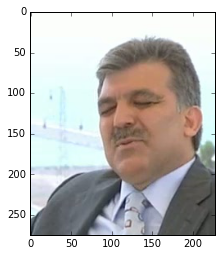

In [5]:
plt.imshow(img_cp)

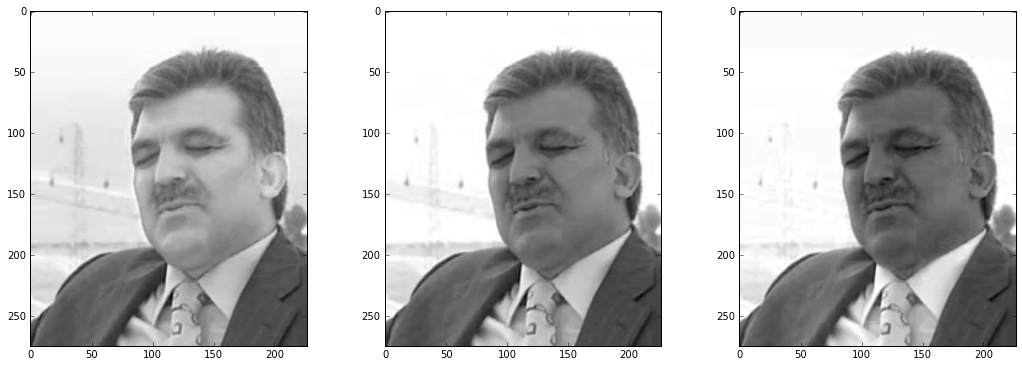

In [6]:
r = img_cp[:, :, 0]
g = img_cp[:, :, 1]
b = img_cp[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 6))
ax0.imshow(r, cmap='gray')
ax1.imshow(g, cmap='gray')
ax2.imshow(b, cmap='gray')

# Experiment 1. K-clustering to segment the image

In [12]:
# Reshape the data: one column for each feature (R/G/B):
img_1 = img_cp.reshape((-1, 3))

# Convert to float
img_1 = np.float32(img_1)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.1)
k = 3
retval, labels, centers = cv2.kmeans(img_1, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [13]:
# convert data into 8-bit values
centers = np.uint8(centers)
print centers

# Q: Not very clear? 
segmented_data = centers[labels.flatten()]
print segmented_data.shape

[[ 98  93  90]
 [233 245 248]
 [166 139 128]]
(62425L, 3L)


(275L, 227L)


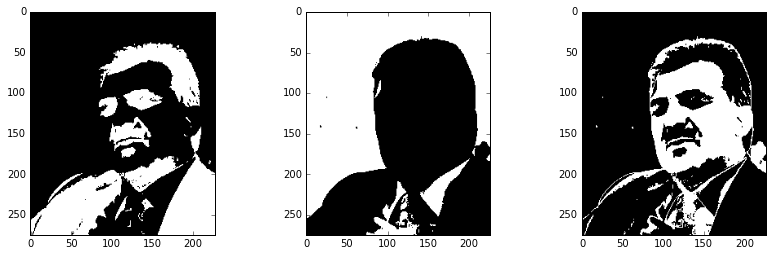

In [14]:
labels_img = labels.reshape(img_cp.shape[:2])
print labels_img.shape

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
ax1.imshow(labels_img==0, cmap='gray')
ax2.imshow(labels_img==1, cmap='gray')
ax3.imshow(labels_img==2, cmap='gray')

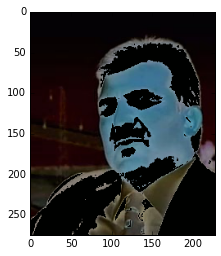

In [15]:
i_cluster = 0
color_cluster = [0, 255, 0]
img_masked = img_1.reshape(img_cp.shape)

img_masked[labels_img==i_cluster] = color_cluster 
plt.imshow(img_masked)

# Experiment 2. Generate contour of the face from a binary image

# Experiment 3. Run corner detector to identify a face 

In [25]:
img3 = cv2.cvtColor(img_cp, cv2.COLOR_RGB2GRAY)
img3 = np.float32(img3)

# apply Harris detection
dst = cv2.cornerHarris(img3, 3, 3, 0.02)
# Dilate to recover the area
dst = cv2.dilate(dst, None)
# 

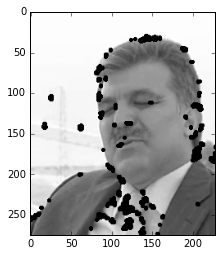

In [26]:
thresh = 0.01*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(img3)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)
            
plt.imshow(corner_image, cmap='gray')